# 1) Delivery_time -> Predict delivery time using sorting time

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Load the dataset
file_path = "C:/Users/Pritee/OneDrive/Documents/data science assignments/assignments/simple linear regression/delivery_time.csv"
df = pd.read_csv(file_path)

In [20]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA

In [4]:
# Display the first few rows of the dataset
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
# Summary statistics of the numerical columns
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
# Check for any missing values
print(df.isnull().sum())

Delivery Time    0
Sorting Time     0
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [8]:
df.shape

(21, 2)

In [9]:
#finding duplicates
df.duplicated().sum()

0

Text(0.5, 1.0, 'Correlation Map')

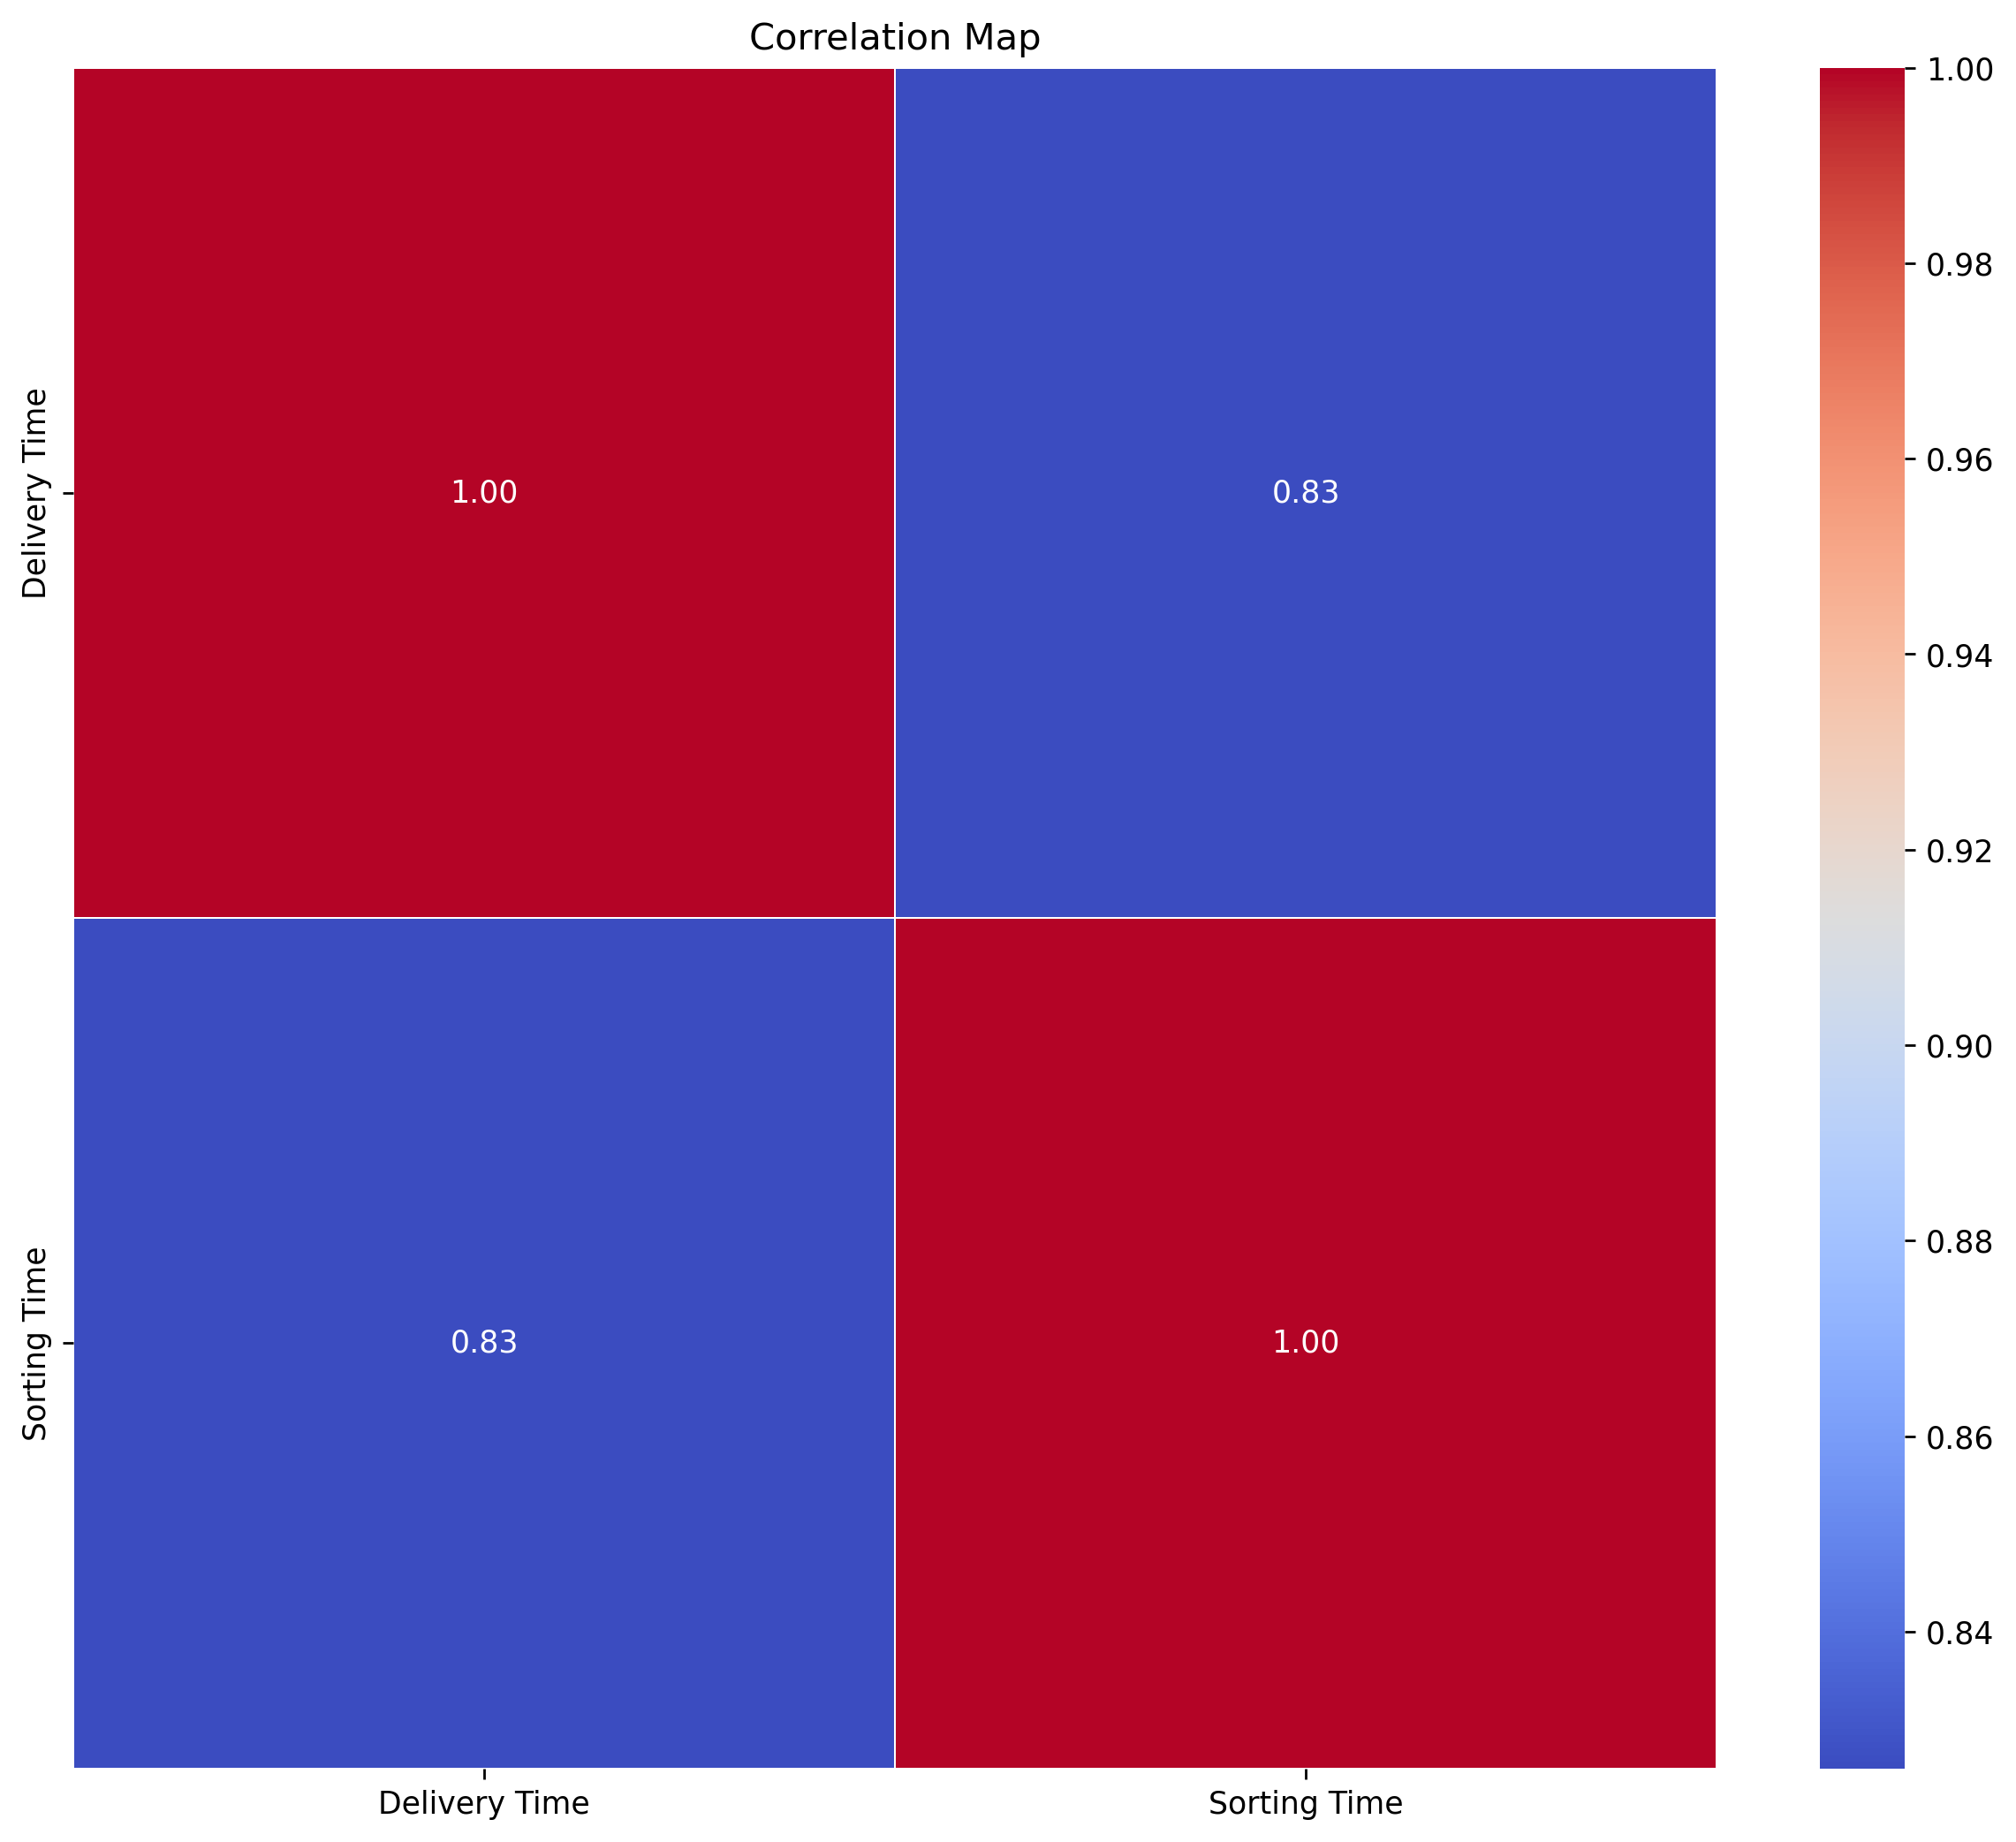

In [10]:
# Assuming df is your DataFrame containing numerical columns
s = df.select_dtypes(include="number").corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Create a heatmap with a diverging color map and display the correlation coefficients
sns.heatmap(s, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
# Add a title
plt.title("Correlation Map")

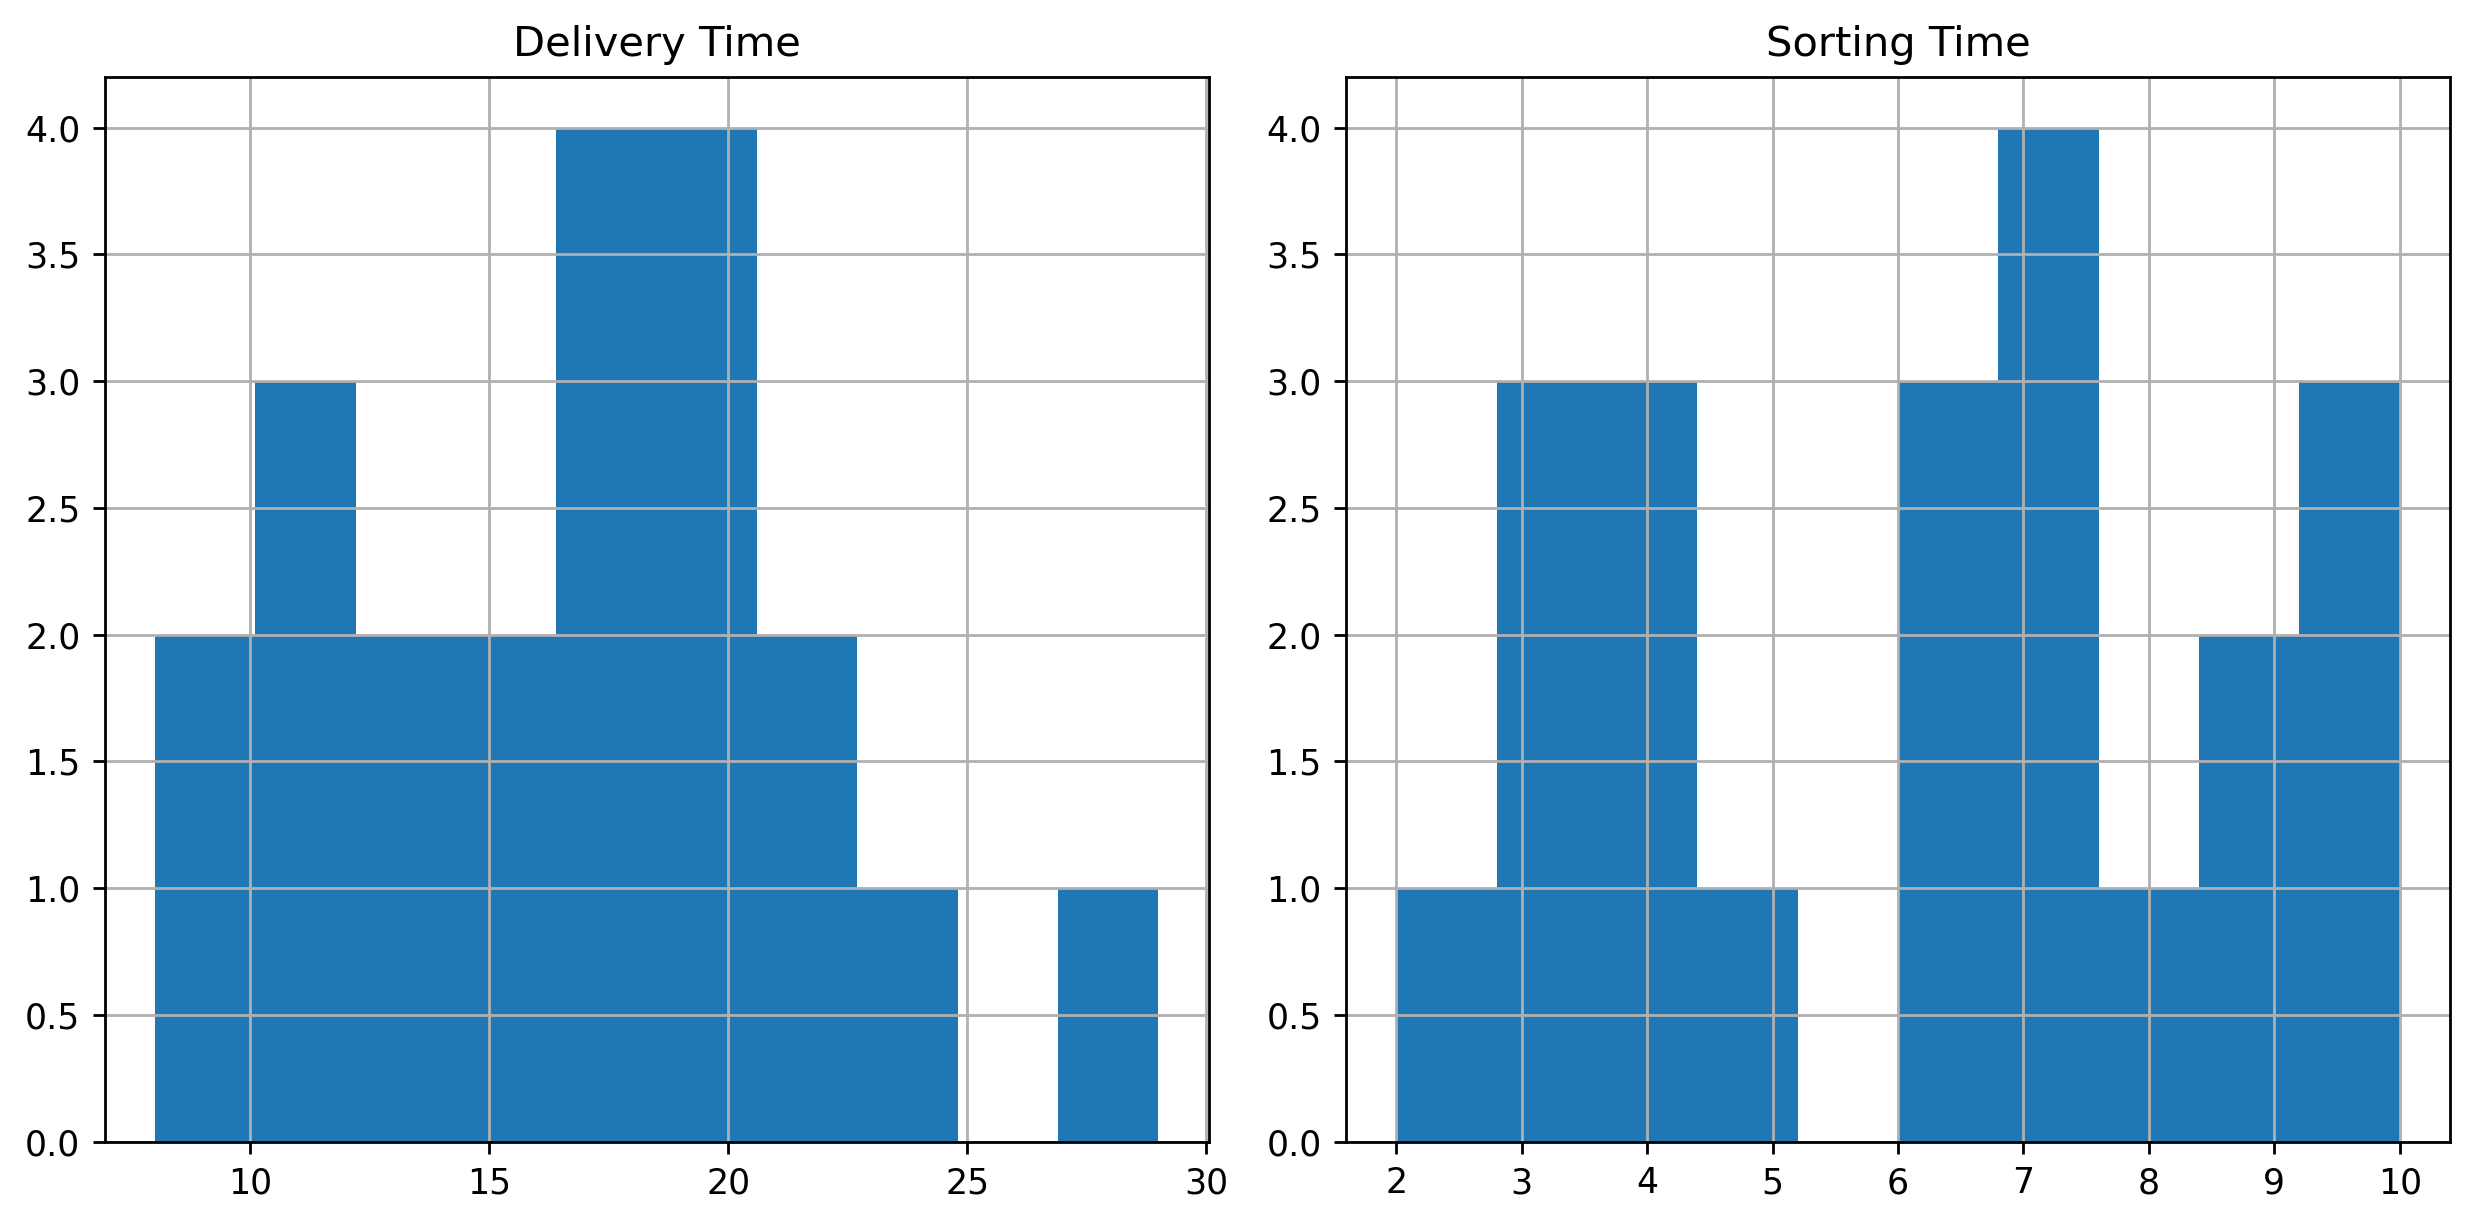

In [11]:
df.hist()
plt.tight_layout()

In [ ]:
#scatterplot to understand relatinship

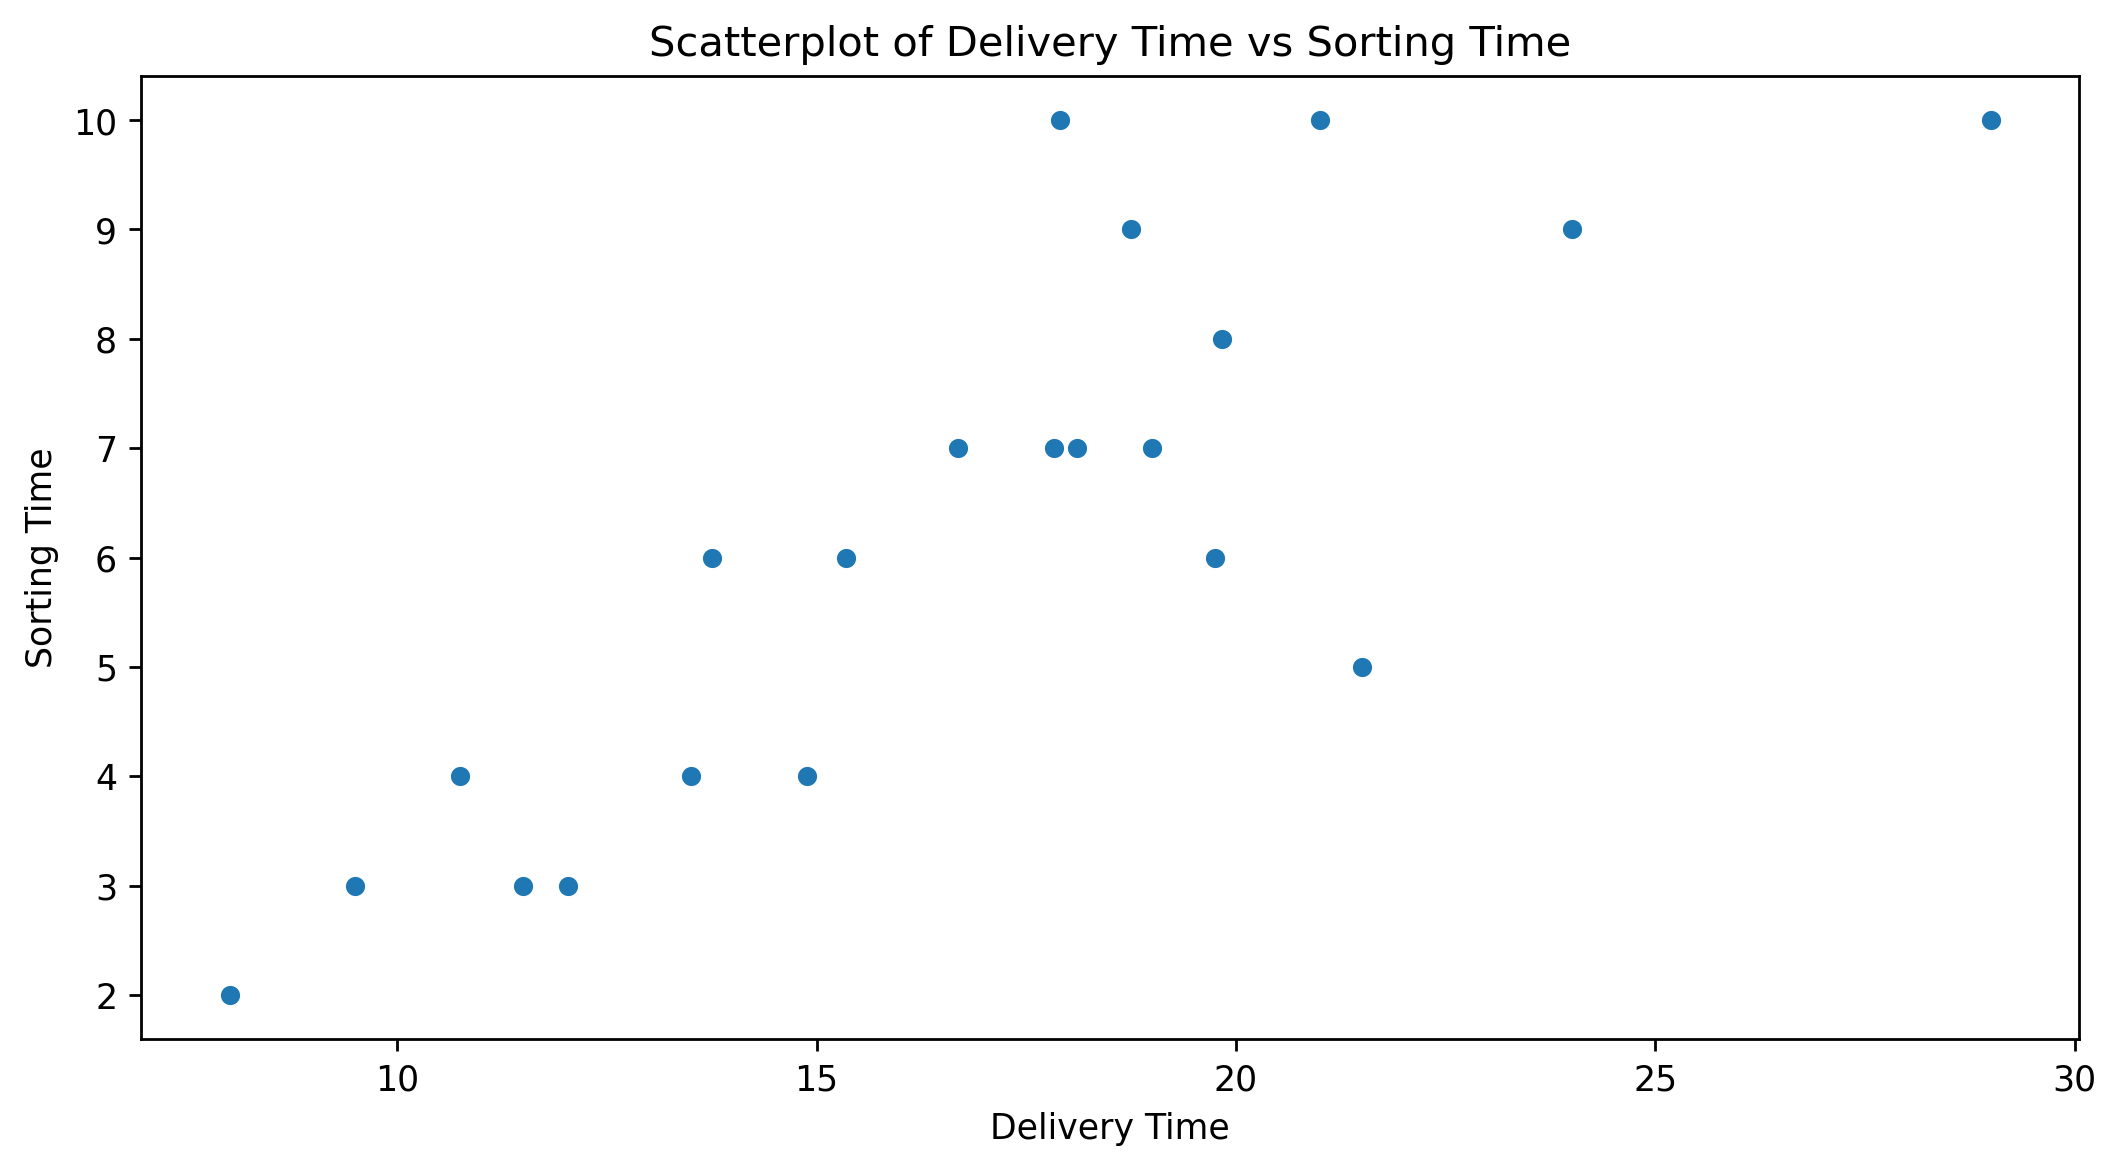

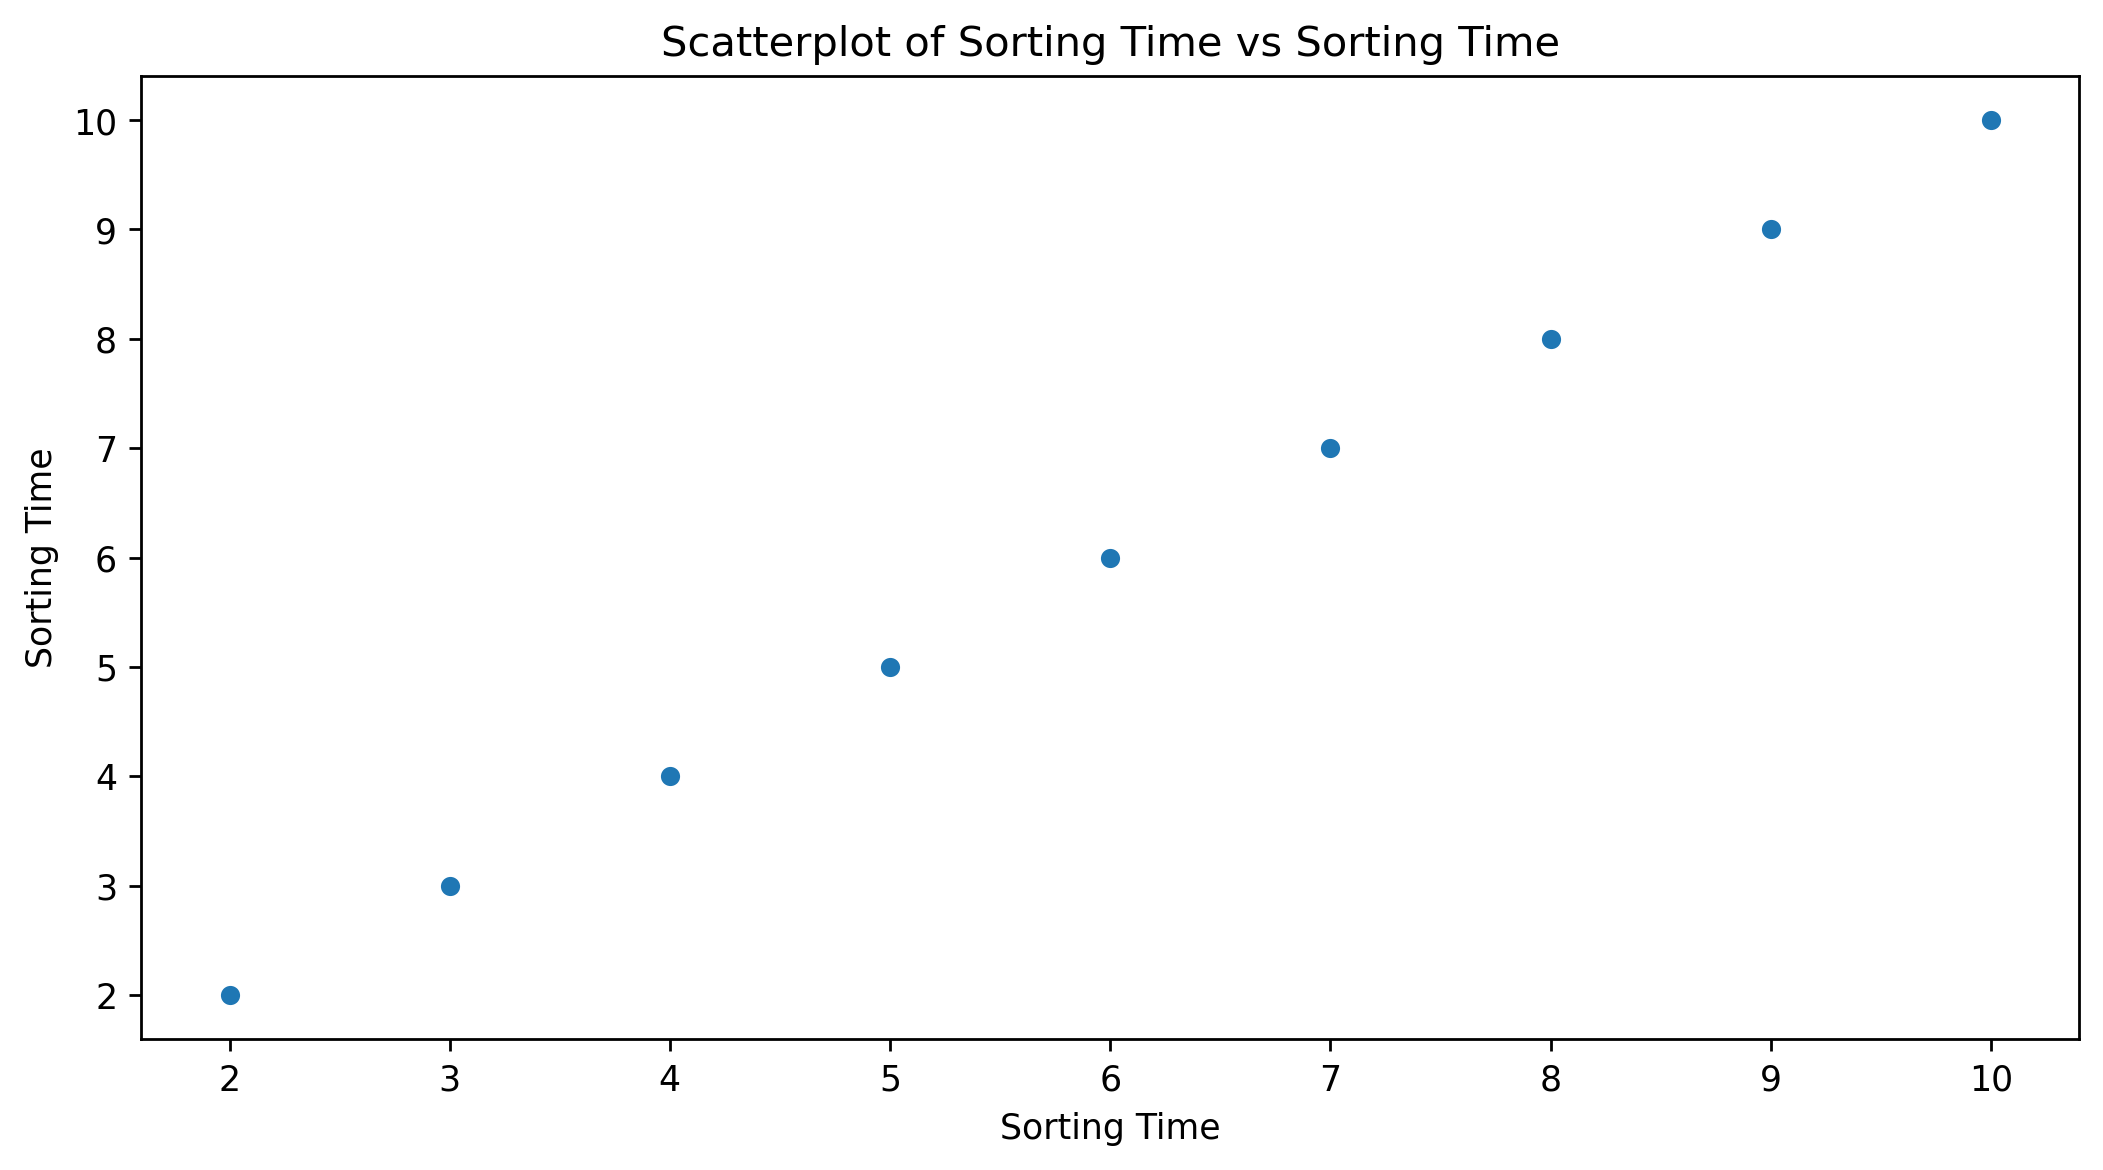

In [13]:
variables_to_plot =['Delivery Time','Sorting Time']

# Loop through the list and create scatterplots
for i in variables_to_plot:
    sns.scatterplot(data=df, x=i, y='Sorting Time')
    plt.title(f'Scatterplot of {i} vs Sorting Time')
    plt.show()

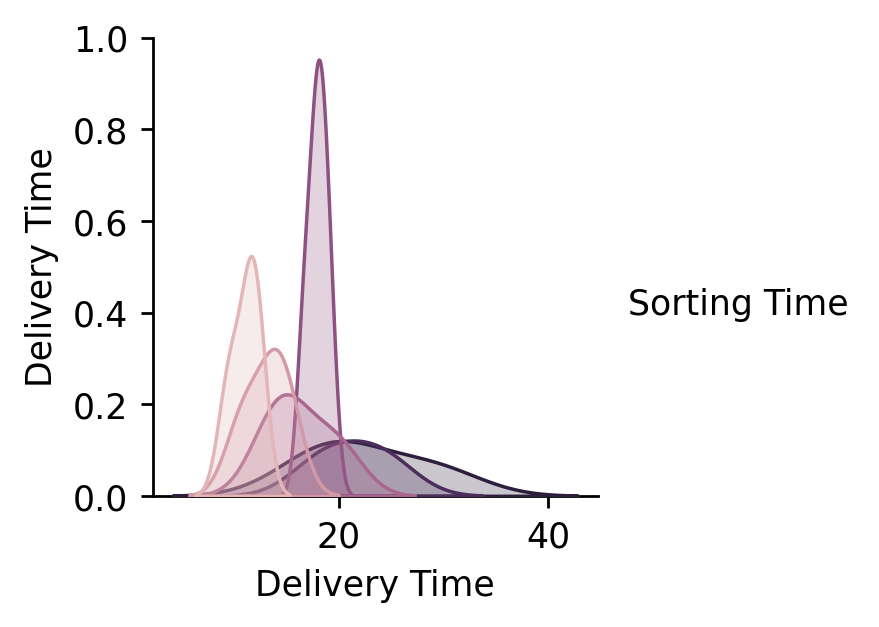

In [14]:
# Pairplot for numerical columns
sns.pairplot(df, hue='Sorting Time')
plt.show()

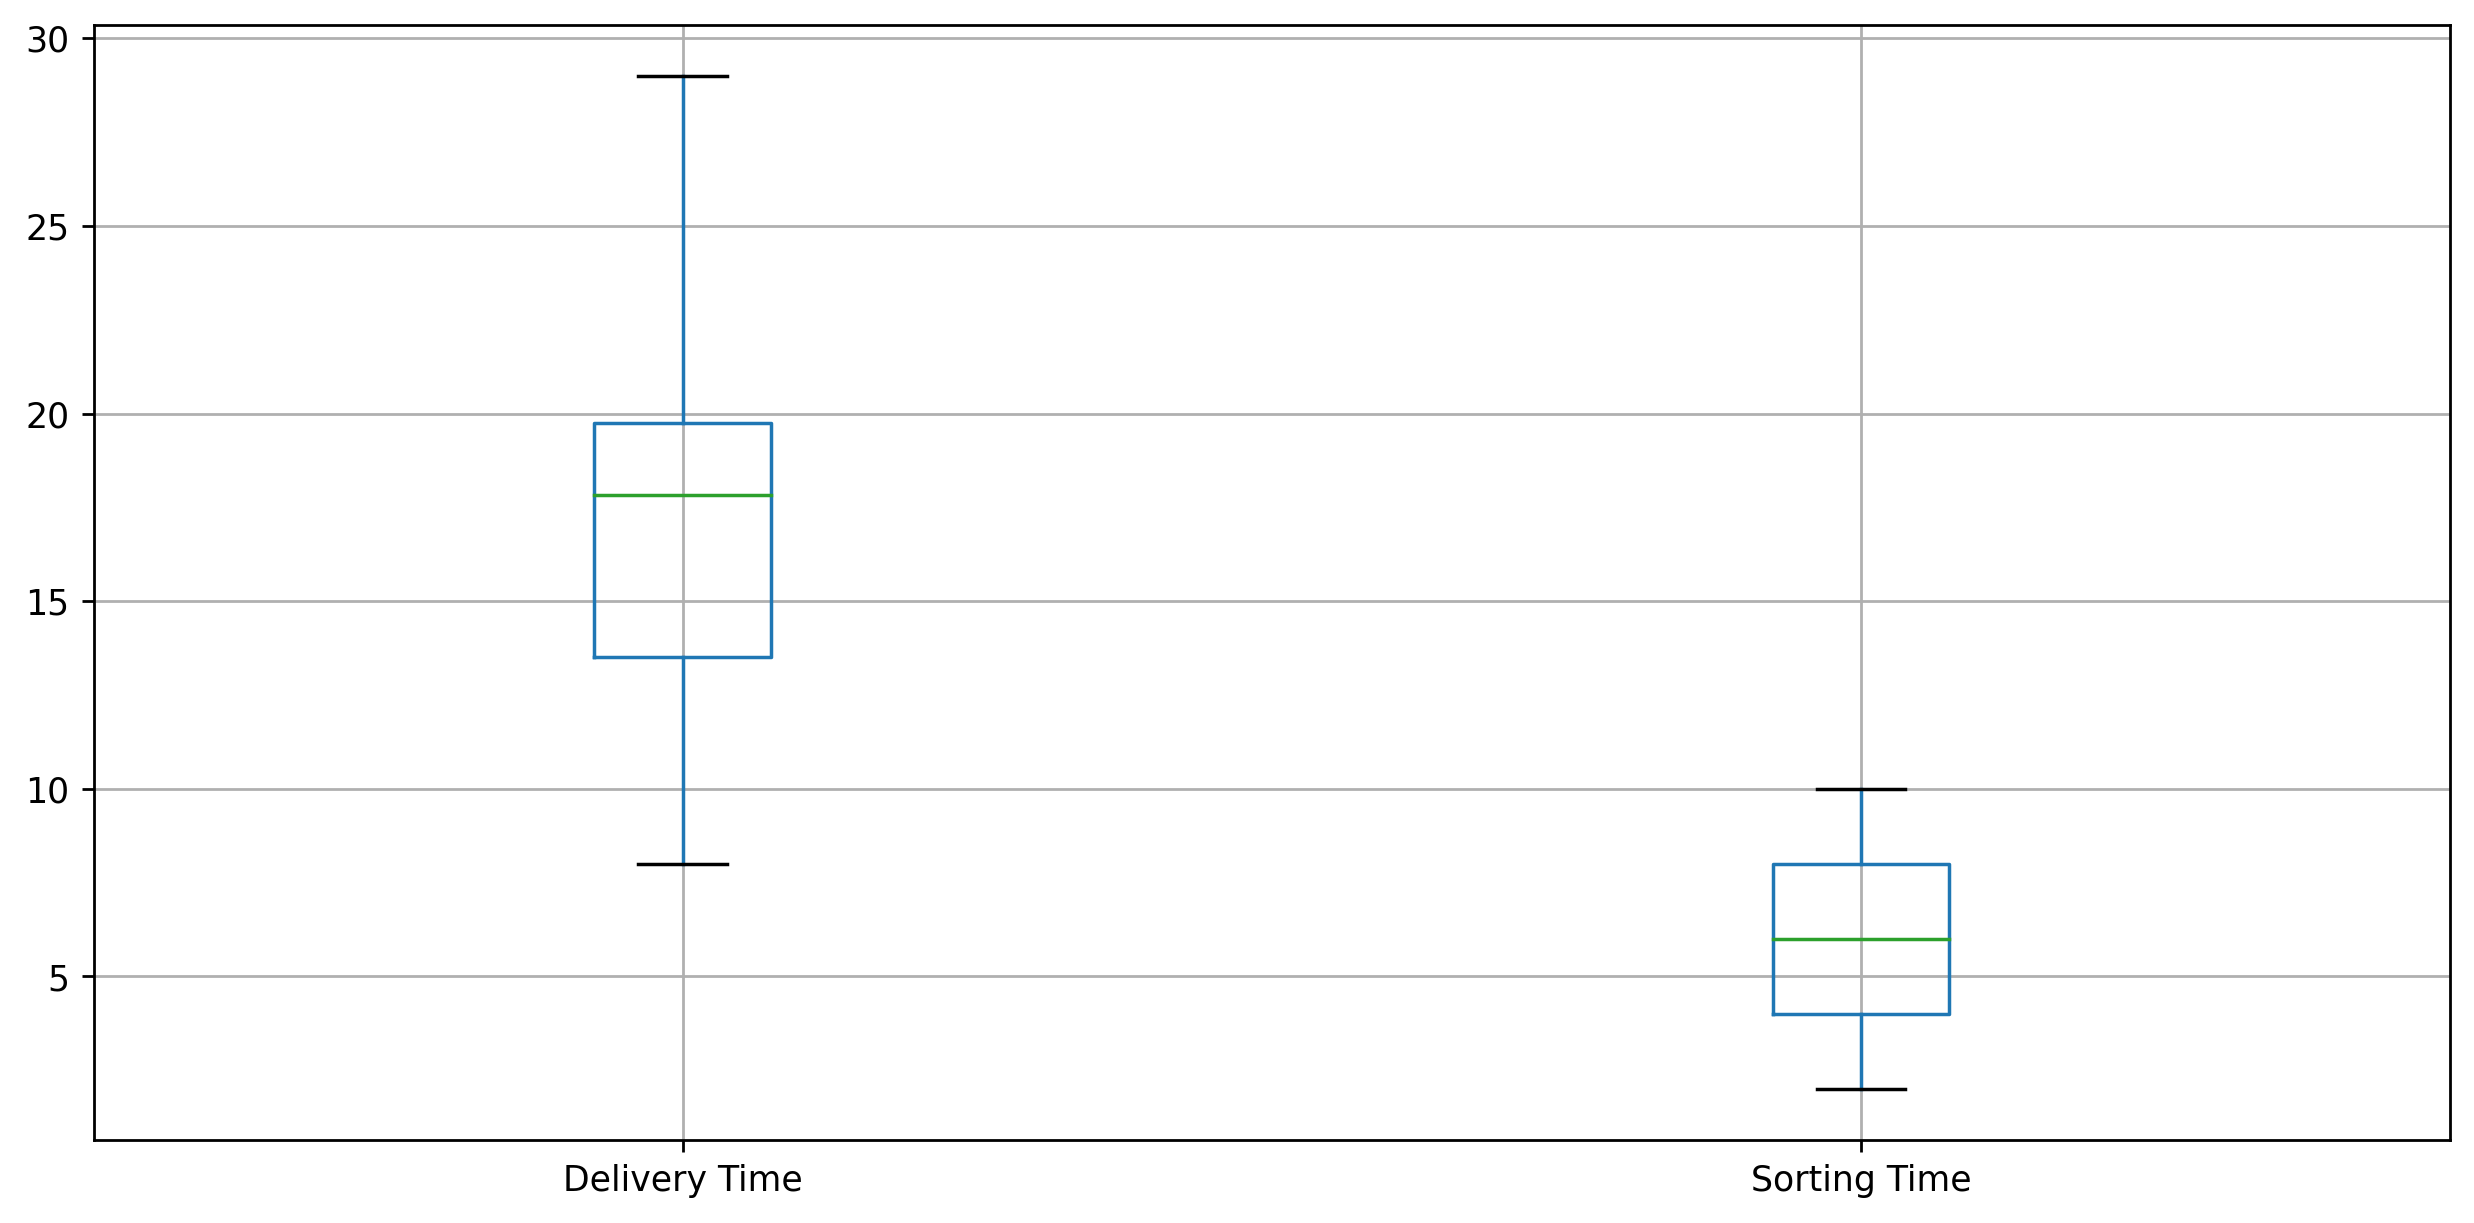

In [15]:
df.boxplot()
plt.tight_layout()

# original model

In [35]:
import numpy as np

# Extract features (X) and target variable (y)
X = df[['Delivery Time']]  # Feature
y = df['Sorting Time']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
r2_score = metrics.r2_score(y_test, y_pred)
adjusted_r2_score = 1 - (1-r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)

# Display the evaluation metrics for the original model
print("Original Model Metrics:")
print("R-squared Score:", r2_score)
print("Adjusted R-squared Score:", adjusted_r2_score)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Original Model Metrics:
R-squared Score: 0.40411996047178333
Adjusted R-squared Score: 0.20549328062904448
Mean Absolute Error (MAE): 1.7173071781664517
Mean Squared Error (MSE): 4.29033628460316
Root Mean Squared Error (RMSE): 2.0713126959981585


# applying transformational models like log, square, sqrt 

In [34]:
# Apply transformational models and evaluate their performance
transformations = ['log', 'sqrt', 'square']

for transformation in transformations:
    # Apply the transformation to the feature
    X_transformed = X.apply(lambda x: np.log1p(x) if transformation == 'log' else np.sqrt(x) if transformation == 'sqrt' else np.square(x))
    
    # Split the transformed dataset into training and testing sets
    X_train_transformed, X_test_transformed, _, _ = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

    # Fit the model to the transformed training data
    model.fit(X_train_transformed, y_train)

    # Make predictions on the transformed testing data
    y_pred_transformed = model.predict(X_test_transformed)

    # Evaluate the model with transformation
    rmse_transformed = metrics.mean_squared_error(y_test, y_pred_transformed, squared=False)

    # Display the evaluation metrics for the transformed model
    print(f"\nMetrics for {transformation.capitalize()} Transformation:")
    print("Root Mean Squared Error (RMSE):", rmse_transformed)



Metrics for Log Transformation:
Root Mean Squared Error (RMSE): 1.9878420008259094

Metrics for Sqrt Transformation:
Root Mean Squared Error (RMSE): 2.0122604332089318

Metrics for Square Transformation:
Root Mean Squared Error (RMSE): 2.2603628893125993


In [36]:
# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})

# Display the entire DataFrame
print(result_df)

    Actual  Predicted  Difference
0       10   7.550498    2.449502
17       7   6.466098    0.533902
15       4   5.254122   -1.254122
1        4   4.736311   -0.736311
8       10   6.387301    3.612699


Text(0, 0.5, 'Predicted Values')

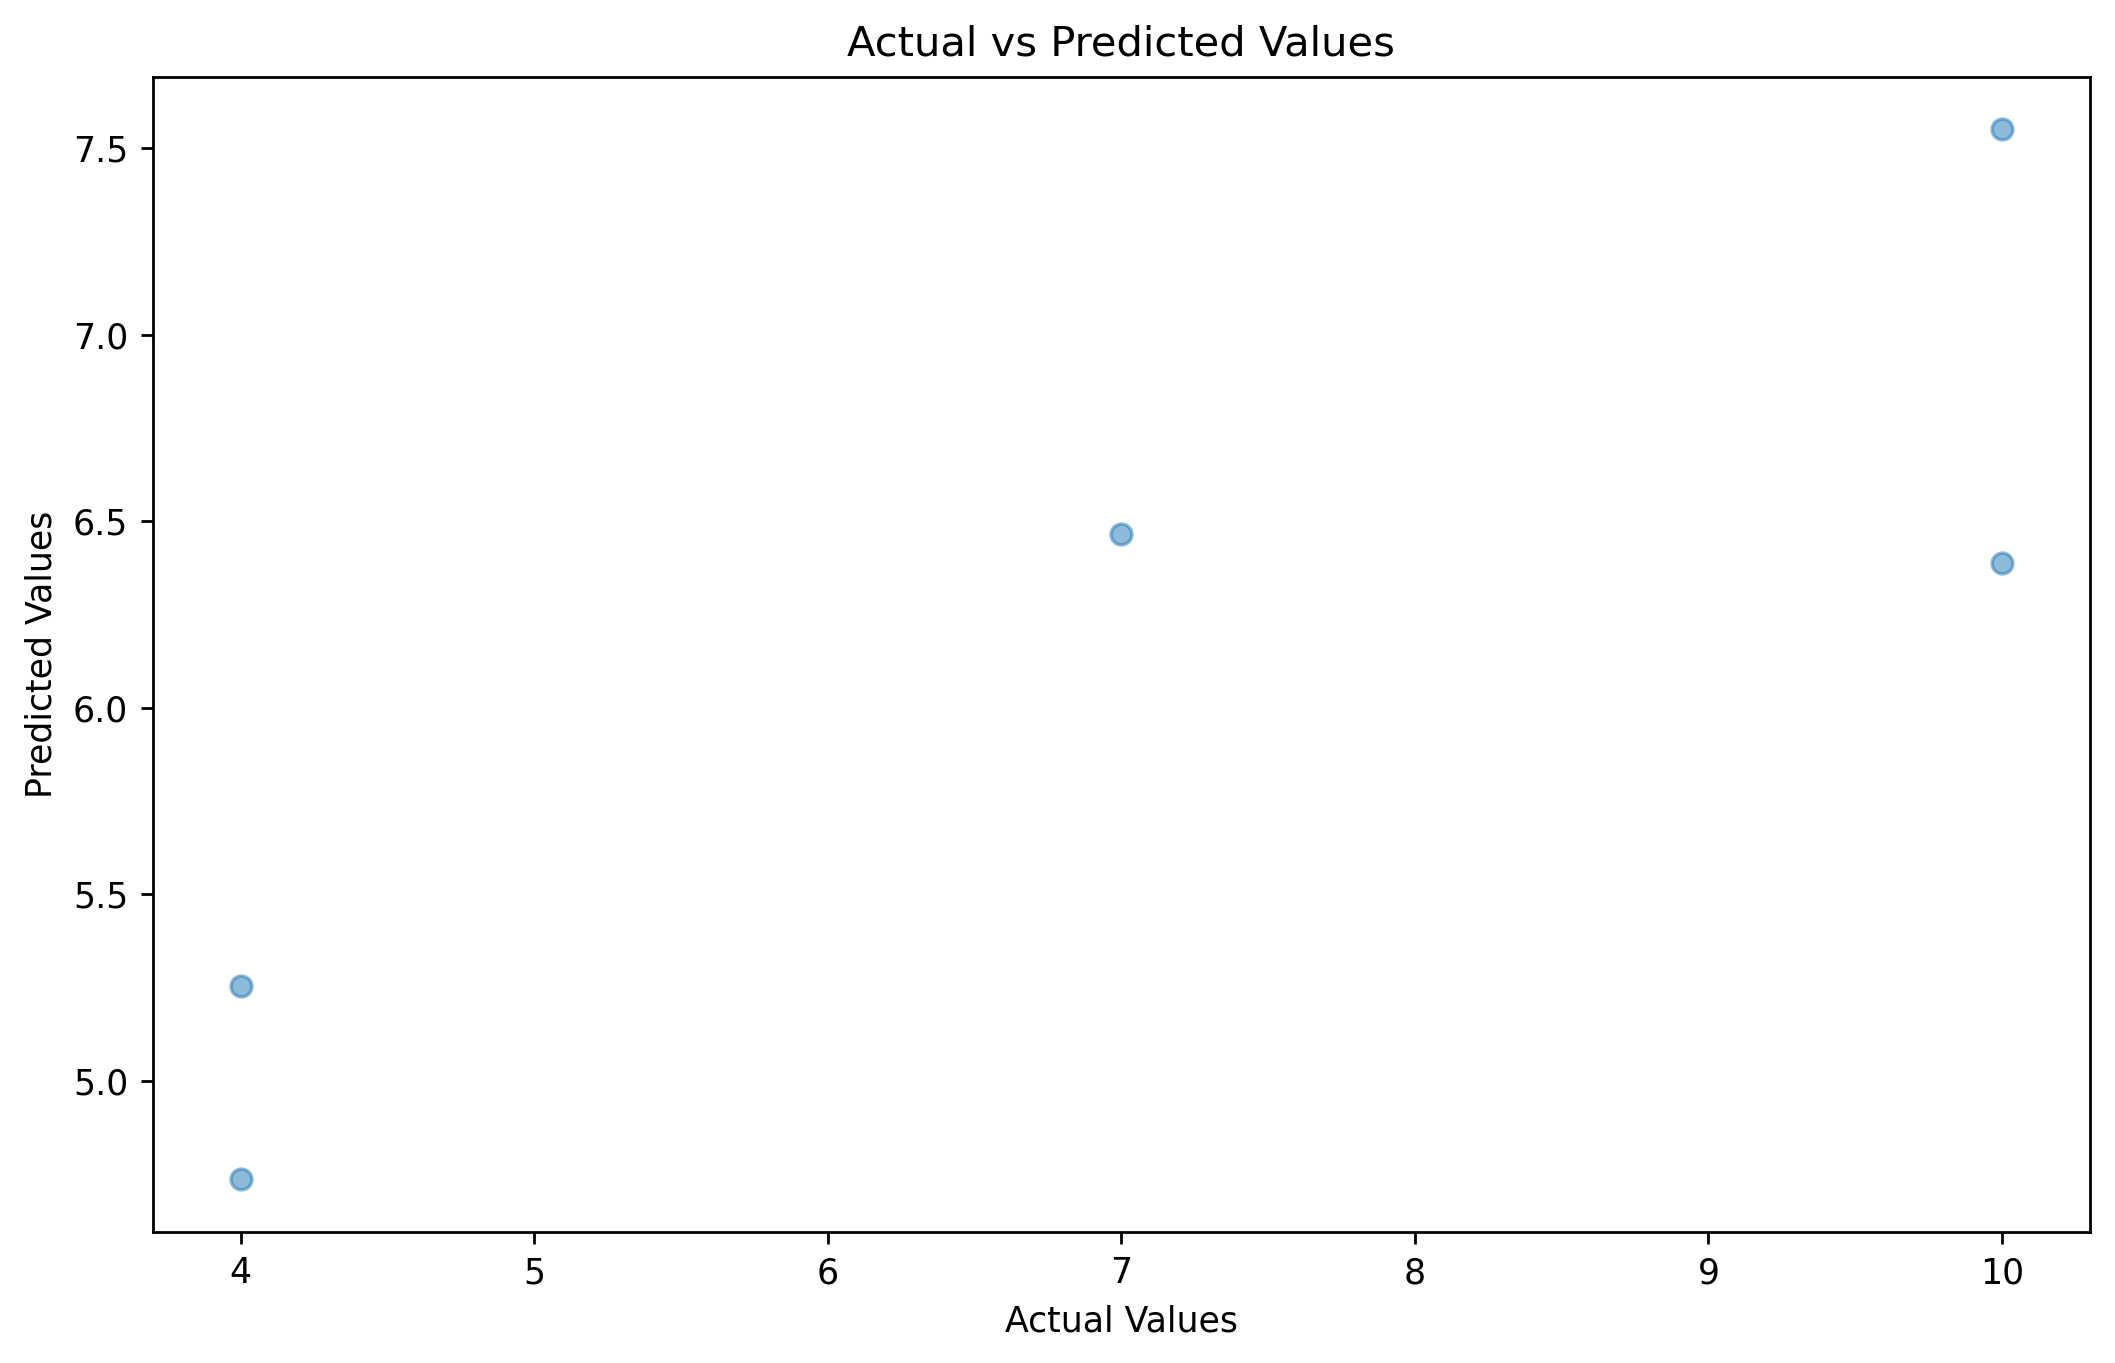

In [37]:
# Plot the difference between actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(result_df['Actual'], result_df['Predicted'], alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Text(0.5, 1.0, 'Q-Q Plot')

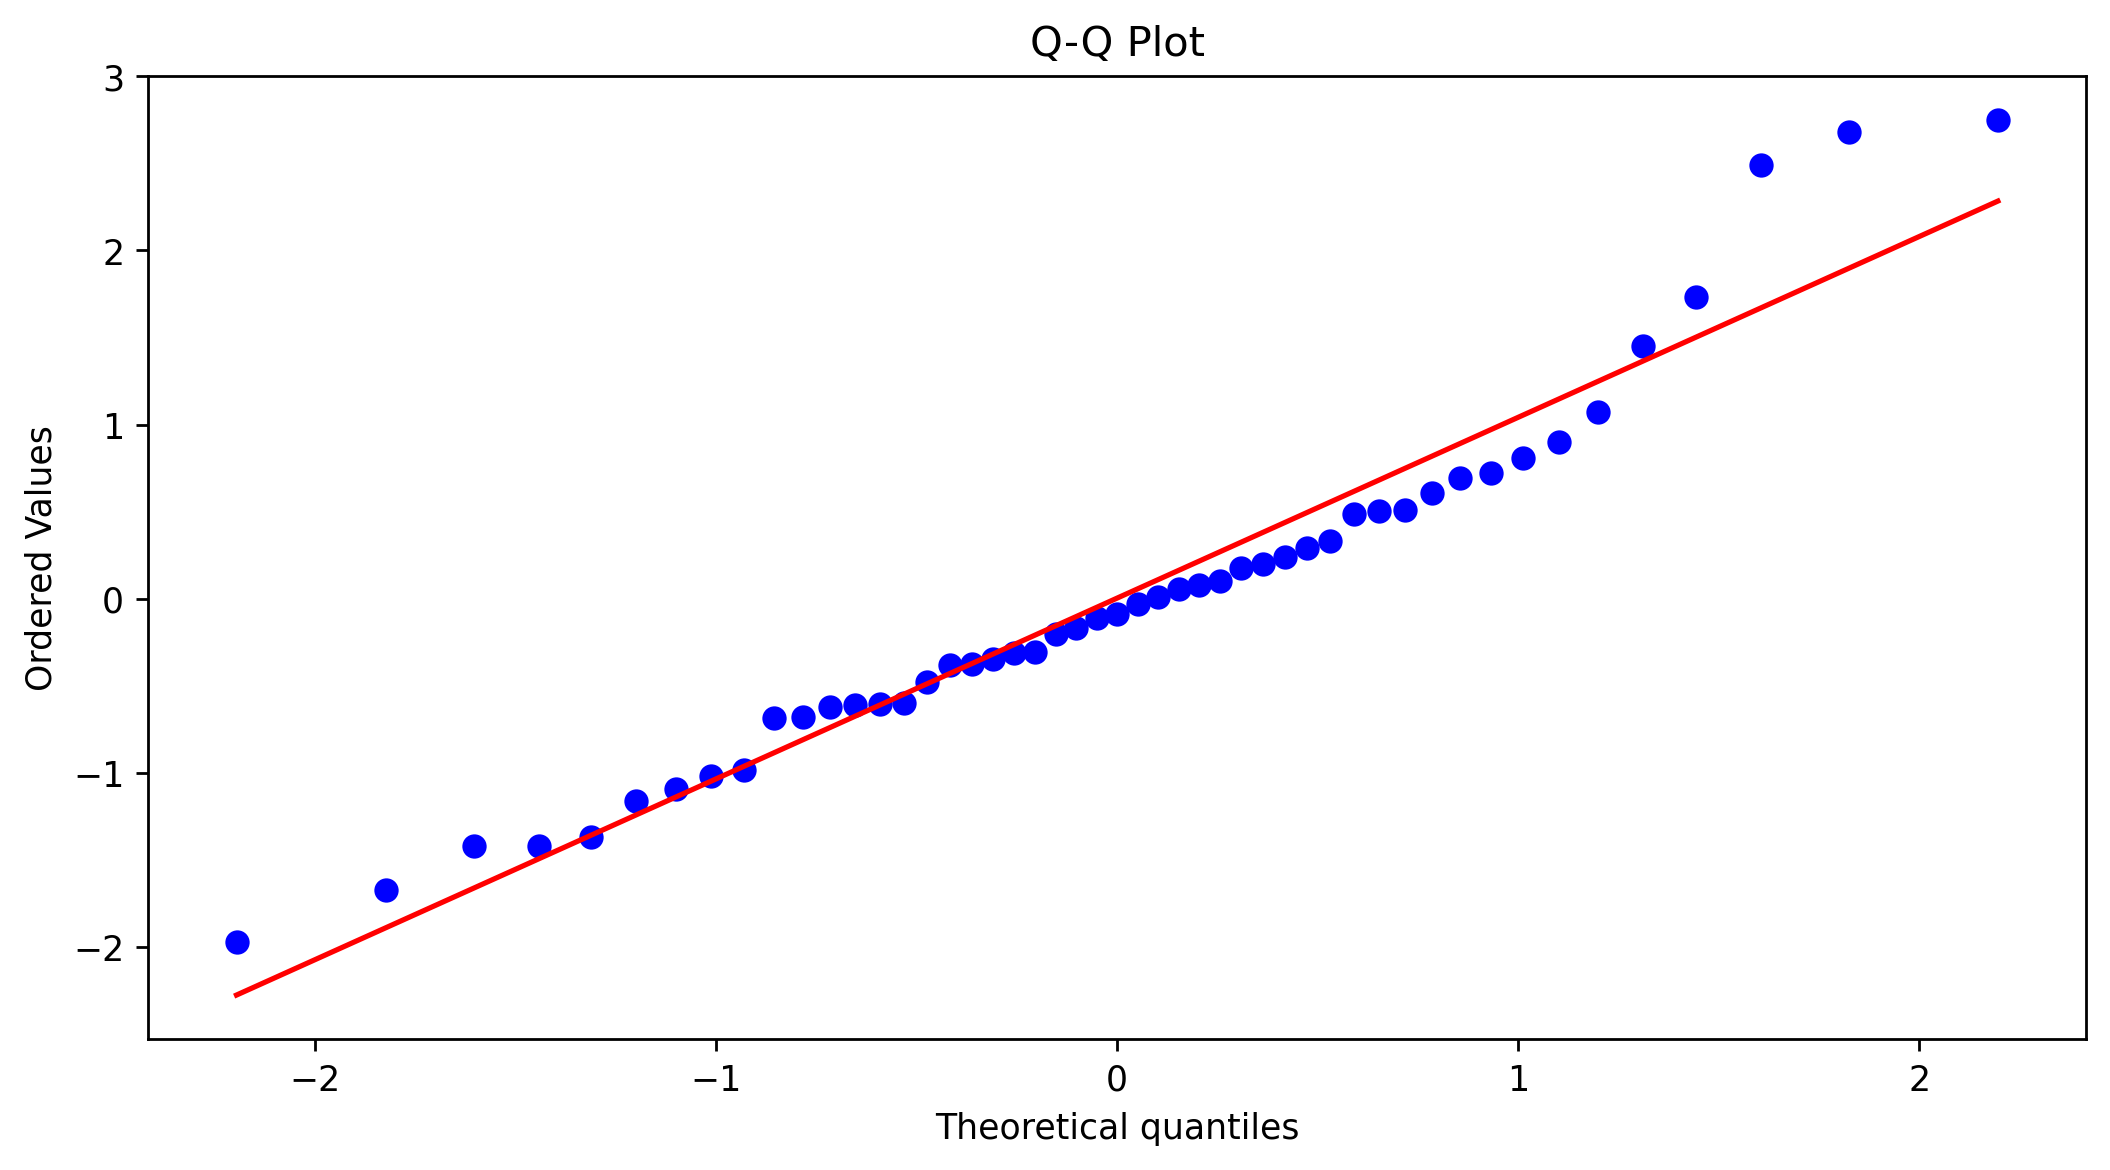

In [38]:
from scipy.stats import probplot

# Generate some random data
data = np.random.normal(size=49)

# Create a Q-Q plot
probplot(data, plot=plt)
plt.title('Q-Q Plot')